In [43]:
# converts arff to csv so that it can be read into pandas dataframe

import os

def getCSVFromArff(fileName):
    with open(fileName, 'r') as fin:
        data = fin.read().splitlines(True)
    i = 0
    cols = []
    for line in data:
        line = line.lower()
        if ('@data' in line):
            i+= 1
            break
        else:
            #print line
            i+= 1
            if (line.startswith('@attribute')):
                if('{' in line):
                    cols.append(line[11:line.index('{')-1])
                else:
                    cols.append(line[11:line.index(' ', 11)])
    headers = ",".join(cols)
    with open(fileName + '.csv', 'w') as fout:
        fout.write(headers)
        fout.write('\n')
        fout.writelines(data[i:])

filename=os.path.basename("/Behavior of the urban traffic - modified.arff")
getCSVFromArff("Behavior of the urban traffic - modified.arff")


In [44]:
#Import data in pandas and remove all leading and lagging blank spaces

import pandas as pd
df = pd.read_csv('Behavior of the urban traffic - modified.arff.csv',delimiter = ',')
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

print(df.astype(bool).sum(axis=0))

hour                                     140
immobilized_bus                           36
broken_truck                              74
vehicle_excess                           140
accident_victim                          138
running_over                             140
fire_vehicles                            140
occurrence_involving_freight               1
incident_involving_dangerous_freight     138
lack_of_electricity                       10
fire                                       1
point_of_flooding                          7
manifestations                             7
defect_in_the_network_of_trolleybuses    138
tree_on_the_road                           6
semaphore_off                            139
intermittent_semaphore                     2
slowness_in_traffic_percent              140
dtype: int64


Here we have successfully imported tha data and removed exra spaces etc to get the data into a readable state.
We will move on to understand the data with and figure out issues.

In [45]:
df.columns

Index(['hour', 'immobilized_bus', 'broken_truck', 'vehicle_excess',
       'accident_victim', 'running_over', 'fire_vehicles',
       'occurrence_involving_freight', 'incident_involving_dangerous_freight',
       'lack_of_electricity', 'fire', 'point_of_flooding', 'manifestations',
       'defect_in_the_network_of_trolleybuses', 'tree_on_the_road',
       'semaphore_off', 'intermittent_semaphore',
       'slowness_in_traffic_percent'],
      dtype='object')

In [46]:
# Get the data type of all the features for converting all to float/int for regression
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
hour                                     140 non-null object
immobilized_bus                          140 non-null float64
broken_truck                             140 non-null float64
vehicle_excess                           140 non-null object
accident_victim                          140 non-null object
running_over                             140 non-null object
fire_vehicles                            140 non-null object
occurrence_involving_freight             140 non-null float64
incident_involving_dangerous_freight     140 non-null object
lack_of_electricity                      140 non-null float64
fire                                     140 non-null float64
point_of_flooding                        140 non-null float64
manifestations                           140 non-null float64
defect_in_the_network_of_trolleybuses    140 non-null object
tree_on_the_road                  

In [6]:
# Find missing data

def show_missing_values(data):
    missing_data = data.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")
show_missing_values(df)


hour
False    140
Name: hour, dtype: int64

immobilized_bus
False    140
Name: immobilized_bus, dtype: int64

broken_truck
False    140
Name: broken_truck, dtype: int64

vehicle_excess
False    140
Name: vehicle_excess, dtype: int64

accident_victim
False    140
Name: accident_victim, dtype: int64

running_over
False    140
Name: running_over, dtype: int64

fire_vehicles
False    140
Name: fire_vehicles, dtype: int64

occurrence_involving_freight
False    140
Name: occurrence_involving_freight, dtype: int64

incident_involving_dangerous_freight
False    140
Name: incident_involving_dangerous_freight, dtype: int64

lack_of_electricity
False    140
Name: lack_of_electricity, dtype: int64

fire
False    140
Name: fire, dtype: int64

point_of_flooding
False    140
Name: point_of_flooding, dtype: int64

manifestations
False    140
Name: manifestations, dtype: int64

defect_in_the_network_of_trolleybuses
False    140
Name: defect_in_the_network_of_trolleybuses, dtype: int64

tree_on_the_road

Fortunately no data is missing. So we will move ahead to find uniquene ociurrences 

In [47]:
def show_unique_values(data_frame):
    print("Unique value for dataset attributes :\n")
    for column in data_frame.columns:
        print(column, " " ,data_frame[column].unique(), "\n")   

show_unique_values(df)


Unique value for dataset attributes :

hour   ['7:00' '7:30' '8:00' '8:30' '9:00' '9:30' '10:00' '10:30' '11:00' '11:30'
 '12:00' '12:30' '13:00' '13:30' '14:00' '14:30' '15:00' '15:30' '16:00'
 '16:30' '17:00' '17:30' '18:00' '18:30' '19:00' '19:30' '20:00'] 

immobilized_bus   [0. 2. 1. 4.] 

broken_truck   [   0. 1000.    2.    1.    5.    4.    3.] 

vehicle_excess   ['T' 'F' 'f'] 

accident_victim   ['0.0' '1.0' '2.0' '3.0' '-0.0' ''] 

running_over   ['0.0' 'NO' '1.0' '2.0' '-1.0'] 

fire_vehicles   ['NO' '0.0' 'YES'] 

occurrence_involving_freight   [0. 1.] 

incident_involving_dangerous_freight   ['0.0' '1.0' ''] 

lack_of_electricity   [0. 1. 2. 4. 3.] 

fire   [0. 1.] 

point_of_flooding   [0.e+00 2.e+03 1.e+00 3.e+00 7.e+00] 

manifestations   [ 0.  1. -1.] 

defect_in_the_network_of_trolleybuses   ['0.0' '1.0' '3.0' '2.0' '-8.0' ''] 

tree_on_the_road   [0. 1.] 

semaphore_off   ['0.0' '1.0' '2.0' '4.0' ''] 

intermittent_semaphore   [0. 1.] 

slowness_in_traffic_percent   

In [48]:
# data manipulation and wrangling 

df2 = df.copy()
df['hour'] = df['hour'].str.replace(':','') # remove colon from hour
df['vehicle_excess'].replace('T', 1, inplace= True)
df['vehicle_excess'].replace(['F' ,'f'], 0, inplace= True)
df['fire_vehicles'].replace('YES', 1, inplace= True)
df['fire_vehicles'].replace('NO', 0, inplace= True)
df['running_over'].replace('NO', 0, inplace= True)
df['accident_victim'].replace('', 0, inplace= True)
df['incident_involving_dangerous_freight'].replace('', 0, inplace= True) # replace blank values with 0
df['defect_in_the_network_of_trolleybuses'].replace('', 0, inplace= True)
df['semaphore_off'].replace('', 0, inplace= True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
hour                                     140 non-null object
immobilized_bus                          140 non-null float64
broken_truck                             140 non-null float64
vehicle_excess                           140 non-null int64
accident_victim                          140 non-null object
running_over                             140 non-null object
fire_vehicles                            140 non-null object
occurrence_involving_freight             140 non-null float64
incident_involving_dangerous_freight     140 non-null object
lack_of_electricity                      140 non-null float64
fire                                     140 non-null float64
point_of_flooding                        140 non-null float64
manifestations                           140 non-null float64
defect_in_the_network_of_trolleybuses    140 non-null object
tree_on_the_road                   

In [53]:
# convert data type of features with object data type to float

df.immobilized_bus = df.immobilized_bus.astype(float).fillna(0.0)
df.accident_victim = df.accident_victim.astype(float).fillna(0.0)
df.running_over = df.running_over.astype(float).fillna(0.0)
df.fire_vehicles = df.fire_vehicles.astype(float).fillna(0.0)
df.incident_involving_dangerous_freight = df.incident_involving_dangerous_freight.astype(float).fillna(0.0)
df.defect_in_the_network_of_trolleybuses = df.defect_in_the_network_of_trolleybuses.astype(float).fillna(0.0)
df.semaphore_off = df.semaphore_off.astype(float).fillna(0.0)
df.hour = df.hour.astype(float).fillna(0.0)
print(df.info())

df = df.abs()

df_rfe = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
hour                                     140 non-null float64
immobilized_bus                          140 non-null float64
broken_truck                             140 non-null float64
vehicle_excess                           140 non-null float64
accident_victim                          140 non-null float64
running_over                             140 non-null float64
fire_vehicles                            140 non-null float64
occurrence_involving_freight             140 non-null float64
incident_involving_dangerous_freight     140 non-null float64
lack_of_electricity                      140 non-null float64
fire                                     140 non-null float64
point_of_flooding                        140 non-null float64
manifestations                           140 non-null float64
defect_in_the_network_of_trolleybuses    140 non-null float64
tree_on_the_road           

Now we are done with the data wrangling and cleaning. The data is in a far better state and can now be used for anlysis and all. We will try to understand the feature affects and step by step move towards figuring out the features that most effect the slowness in traffic.

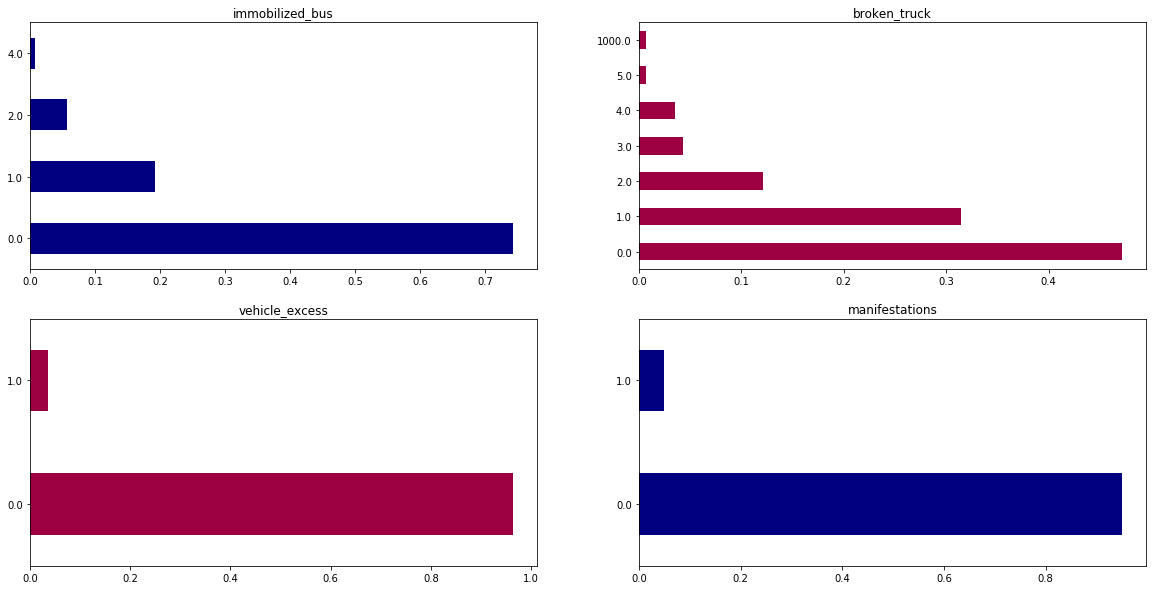

In [54]:

import matplotlib.pyplot as plt 
plt.figure(1) 
from matplotlib import cm
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')

plt.subplot(221) 
df['immobilized_bus'].value_counts(normalize=True).plot.barh(figsize=(20,10), cmap=cmap, title= 'immobilized_bus') 

plt.subplot(222) 
df['broken_truck'].value_counts(normalize=True).plot.barh(title= 'broken_truck', cmap=cmap1) 

plt.subplot(223) 
df['vehicle_excess'].value_counts(normalize=True).plot.barh(title= 'vehicle_excess', cmap=cmap1) 

plt.subplot(224) 
df['manifestations'].value_counts(normalize=True).plot.barh(title= 'manifestations', cmap=cmap) 


plt.show()



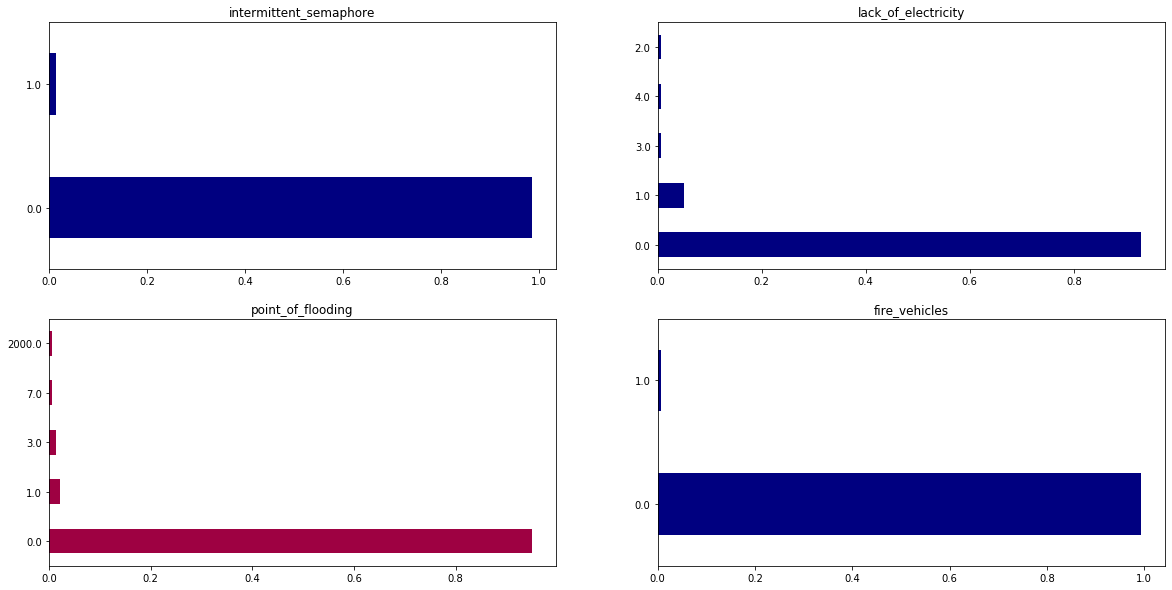

In [43]:
plt.subplot(221) 
df['intermittent_semaphore'].value_counts(normalize=True).plot.barh(figsize=(20,10), cmap=cmap, title= 'intermittent_semaphore')

plt.subplot(222) 
df['lack_of_electricity'].value_counts(normalize=True).plot.barh(title= 'lack_of_electricity', cmap=cmap)

plt.subplot(223) 
df['point_of_flooding'].value_counts(normalize=True).plot.barh(title= 'point_of_flooding', cmap=cmap1) 

plt.subplot(224) 
df['fire_vehicles'].value_counts(normalize=True).plot.barh(title= 'fire_vehicles', cmap=cmap)

plt.show()

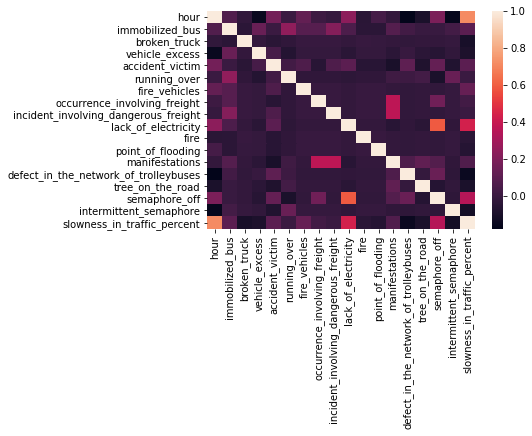

In [55]:
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=False)

# hour, lack_of_electricity , intermittent_semaphore have good relation with target variable
# other features do not have good co-relation for any further action

Here from the correlation heat map, we can figure out that 
1. semaphore (trafiic signa) off is very much related to lack of electricity and maybe we can ignore one of them
2. slowness in traffic is seemingly dependent upon time of day(hour) lack of electricity and semaphore off
3. Few of the atttibutes affect the traffic slowness percent but not too much.

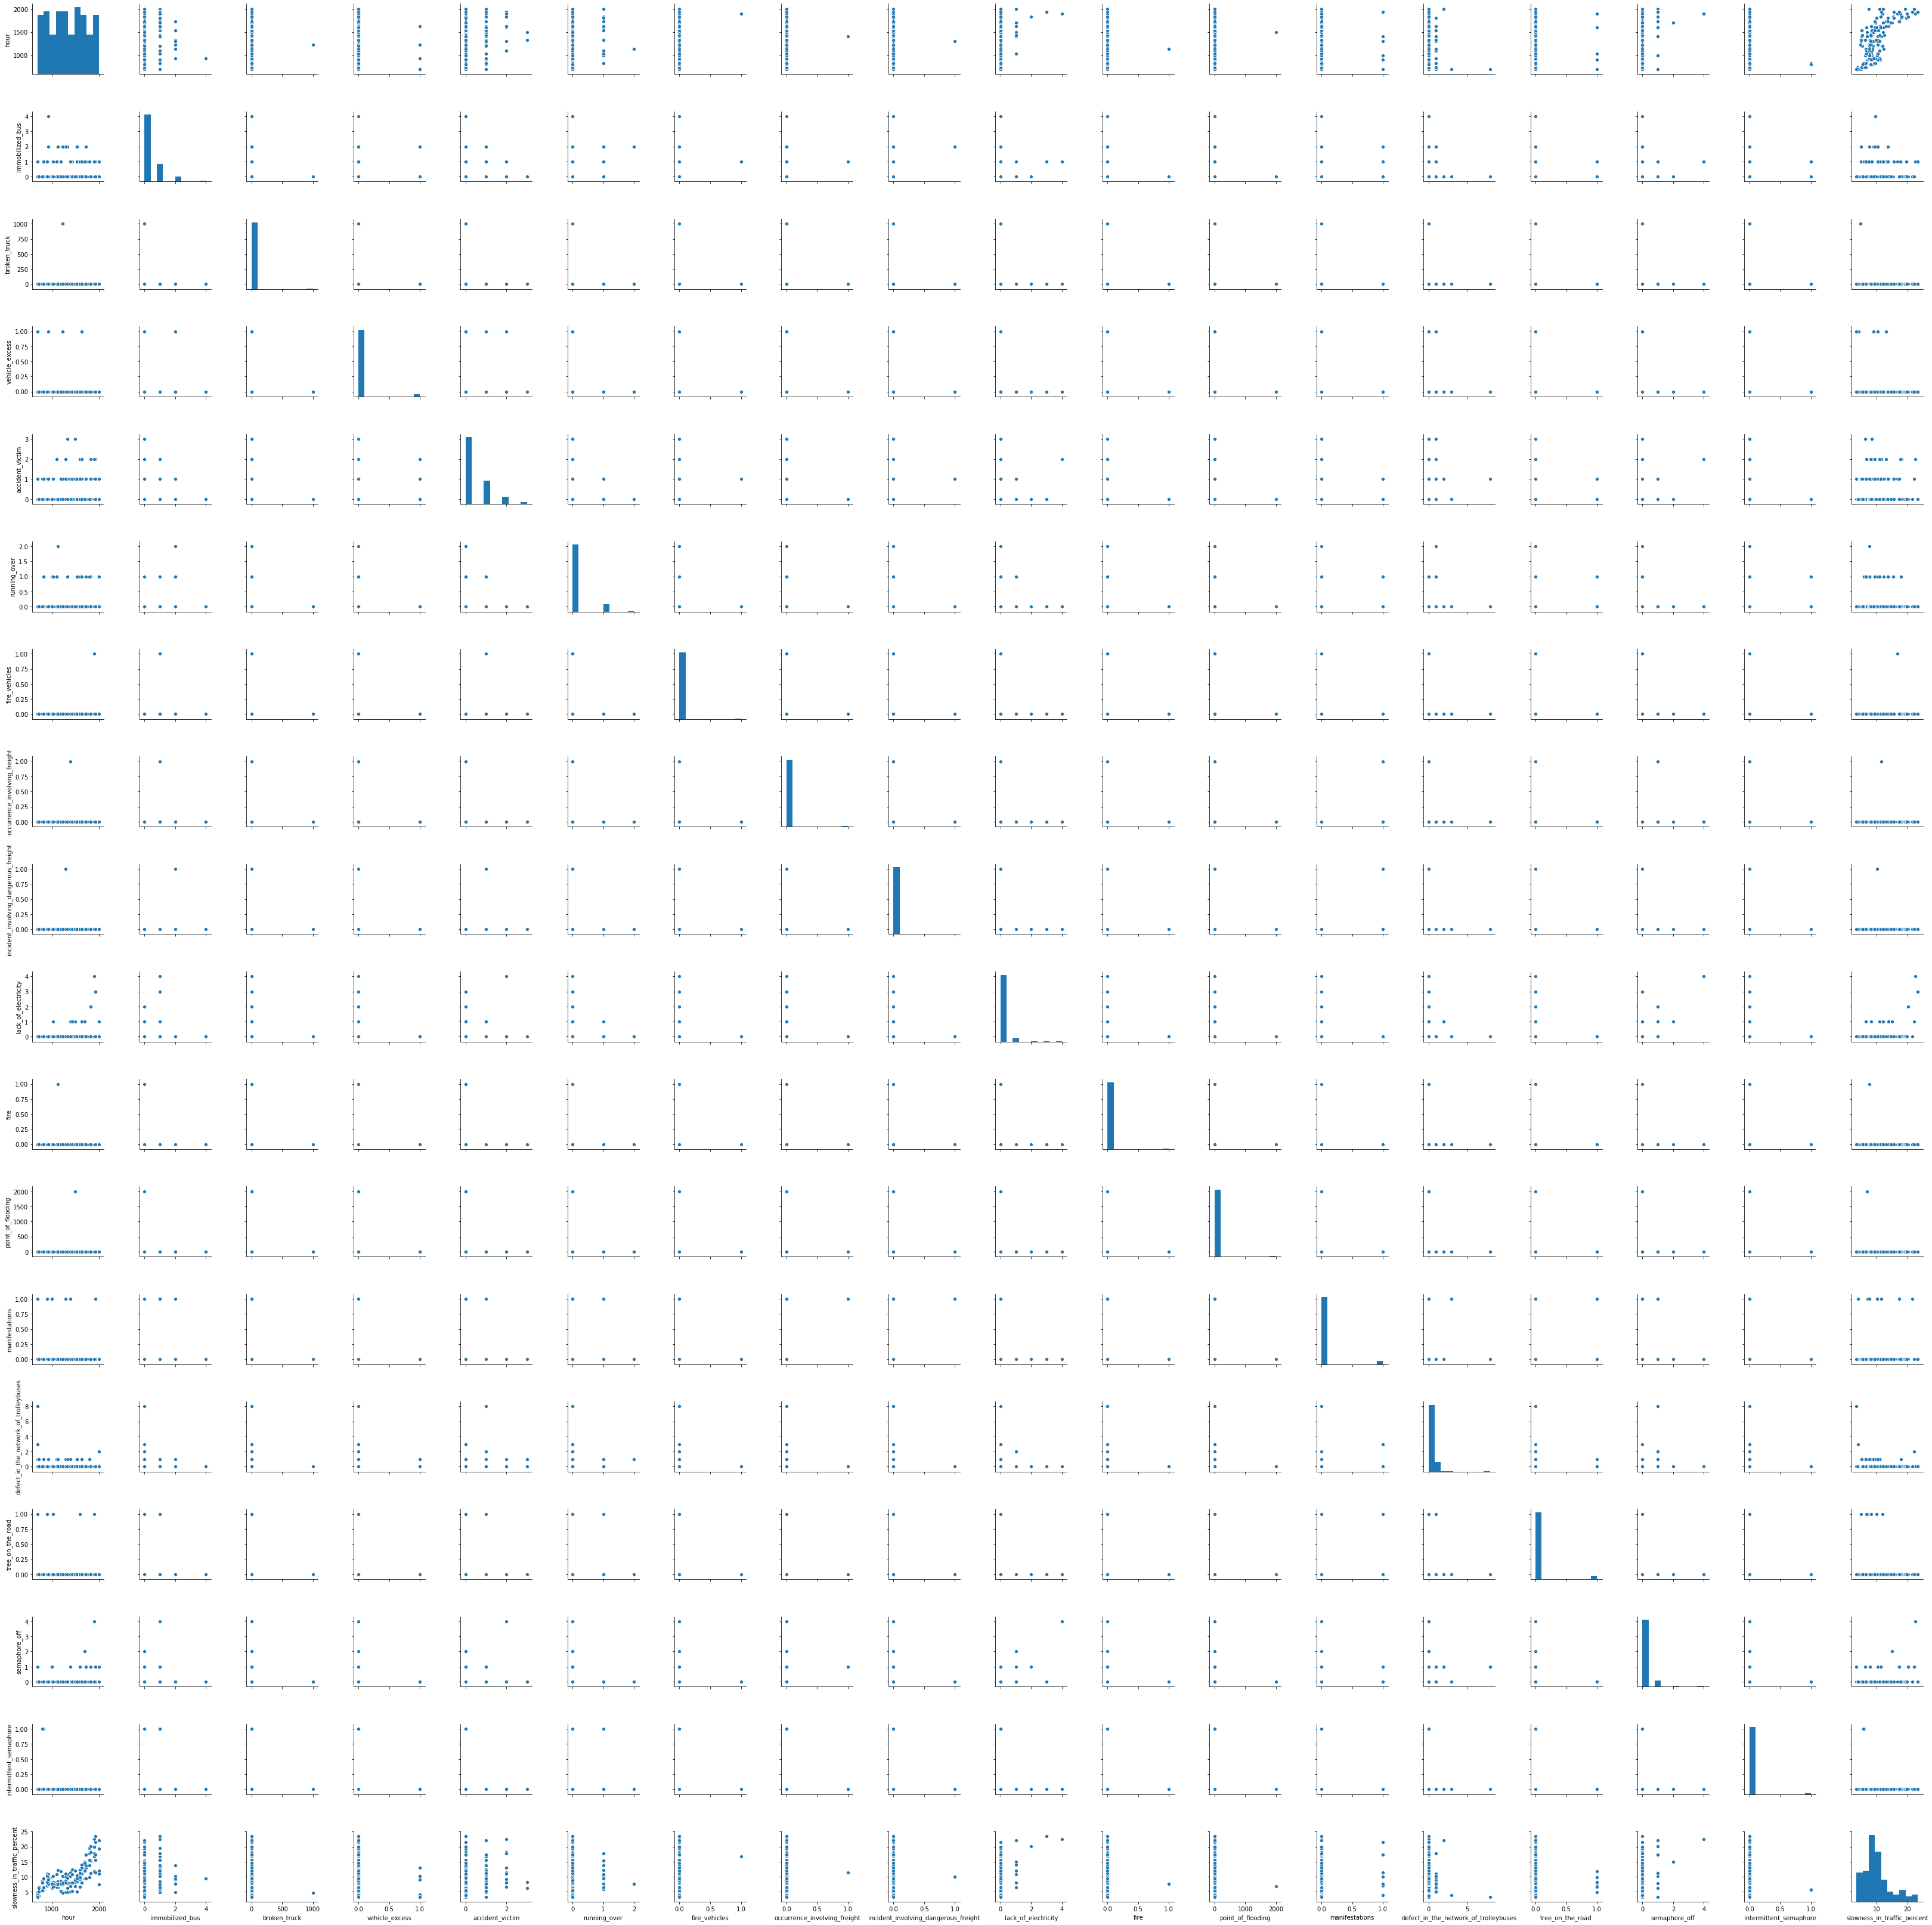

In [8]:
# plot pair plot chart to look at the spread of the data

import seaborn as sns
sns.pairplot(df)

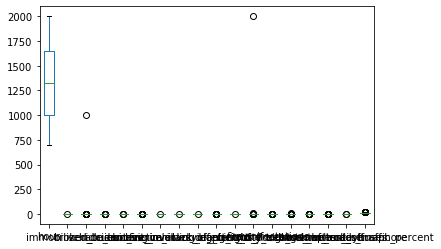

In [56]:
#Outlier detection

ax = df.plot.box()





[[1.65515793 0.51617195 0.09515687 ... 0.27921242 0.12038585 1.36503233]
 [1.57740753 0.51617195 0.09515687 ... 0.27921242 0.12038585 0.78473194]
 [1.39598993 0.51617195 0.09515687 ... 0.27921242 0.12038585 0.2972796 ]
 ...
 [1.45485809 1.02136152 0.09515687 ... 0.27921242 0.12038585 1.79180182]
 [1.53260849 0.51617195 0.04762088 ... 1.89243975 0.12038585 1.72216578]
 [1.71402609 0.51617195 0.09515687 ... 0.27921242 0.12038585 0.49192894]]
(107, 18)


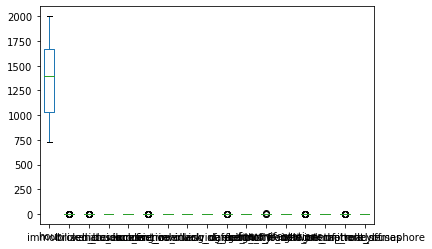

In [67]:
#Outlier detection and removal by Z-score 


from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

df_z = df[(z < 3).all(axis=1)]
print(df_z.shape)

dfc = df_z.copy()
group_names = ['VeryLow','Low', 'Medium', 'High', 'VeryHigh']
dfc['slowness_in_traffic_percent-binned'] = pd.cut(dfc['slowness_in_traffic_percent'], 5, labels=group_names)


y = df_z[['slowness_in_traffic_percent']]
X = df_z.drop(['slowness_in_traffic_percent'], axis=1)



ax = X.plot.box()


(64, 18)


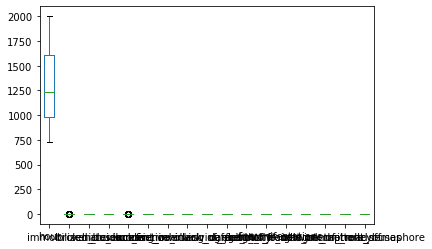

In [68]:
#Outlier detection by IQR 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_IQR.shape)


yI = df_IQR[['slowness_in_traffic_percent']]
XI = df_IQR.drop(['slowness_in_traffic_percent'], axis=1)

ax = XI.plot.box()



In [58]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
print(scaled_df.shape)


#scaler = preprocessing.MinMaxScaler()
#scaled_df = scaler.fit_transform(df)

import numpy as np
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
print ('p value(Prob (F-statistic)) for the estimator is almost zero as per the below summary')


(140, 18)
                                 OLS Regression Results                                
Dep. Variable:     slowness_in_traffic_percent   R-squared:                       0.498
Model:                                     OLS   Adj. R-squared:                  0.451
Method:                          Least Squares   F-statistic:                     10.68
Date:                         Sun, 12 Jan 2020   Prob (F-statistic):           2.36e-11
Time:                                 23:32:00   Log-Likelihood:                -258.12
No. Observations:                          107   AIC:                             536.2
Df Residuals:                               97   BIC:                             563.0
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----

/Users/sp/ai_ml_repo/env_bits/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/sp/ai_ml_repo/env_bits/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/sp/ai_ml_repo/env_bits/lib/python3.6/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/sp/ai_ml_repo/env_bits/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/sp/ai_ml_repo/env_bits/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/sp/ai_ml_repo/

In [59]:
from sklearn.feature_selection import f_regression
f = f_regression(X, y, center=True)

print ('p-value: %s' % f[1])

p-value: [1.51367985e-14 2.16684661e-01 4.73891947e-01            nan
 7.05971604e-02 2.01246497e-01            nan            nan
            nan 1.31195890e-01            nan 1.96762587e-04
            nan 2.07927000e-01            nan 2.13974061e-02
            nan]


/Users/sp/ai_ml_repo/env_bits/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sp/ai_ml_repo/env_bits/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/sp/ai_ml_repo/env_bits/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/sp/ai_ml_repo/env_bits/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/sp/ai_ml_repo/env_bits/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 &

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
import math

#X_n = X[['hour','fire','point_of_flooding','manifestations','tree_on_the_road','intermittent_semaphore']]

# X_new = X.drop(['intermittent_semaphore', 'tree_on_the_road', 'manifestations', 'fire'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)

reg = LinearRegression().fit(X_train,y_train)
print ('score= ',reg.score(X_test,y_test))
print ('slope= ',reg.coef_)
p = reg.predict(X_test)
print( 'rms= ',math.sqrt(mean_squared_error(y_test, p)))
print('r2: ', r2_score(y_test,p))

(74, 17) (74, 1)
score=  0.39998719747793376
slope=  [[ 6.24352398e-03 -1.15596417e-01 -8.60644682e-02 -5.55111512e-17
   1.59218241e-01  5.85354043e-01  4.44089210e-16  0.00000000e+00
   1.11022302e-16 -1.38075576e+00  0.00000000e+00  1.39931349e+00
   0.00000000e+00 -2.30397692e-01  0.00000000e+00  1.29137876e+00
   0.00000000e+00]]
rms=  2.7371165916383
r2:  0.39998719747793376


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#dfc['slowness_in_traffic_percent-binned'] = pd.cut(dfc['slowness_in_traffic_percent'], 5, labels=group_names)


y = dfc[['slowness_in_traffic_percent-binned']]
X = dfc.drop(['slowness_in_traffic_percent','slowness_in_traffic_percent-binned'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
    
#Construct decision tree
dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_train, y_train)

#Use the decision tree for prediction on test data
y_pred = dt.predict(X_test)
    
    #Prepare the confusion matrix
actuals = np.array(y_test)
predictions = np.array(y_pred)
    

print("Confusion Matrix : ")
print(confusion_matrix(actuals, predictions), "\n")


print ("Accuracy : ", accuracy_score(y_test,y_pred)*100, "\n") 


print("Classification Report : \n", classification_report(y_test, y_pred), "\n")

Confusion Matrix : 
[[ 0  1  2  0  0]
 [ 0 10  4  0  1]
 [ 2  2  1  0  1]
 [ 0  0  1  0  0]
 [ 0  1  1  0  6]] 

Accuracy :  51.515151515151516 

Classification Report : 
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         3
         Low       0.71      0.67      0.69        15
      Medium       0.11      0.17      0.13         6
    VeryHigh       0.00      0.00      0.00         1
     VeryLow       0.75      0.75      0.75         8

    accuracy                           0.52        33
   macro avg       0.32      0.32      0.31        33
weighted avg       0.53      0.52      0.52        33
 



/Users/sp/ai_ml_repo/env_bits/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from sklearn.feature_selection import RFE
def get_top_k_features_by_rfe(data, top_k, show_results=True):
    #Preprare the independant and target attributes
    dt = LinearRegression(fit_intercept=True)
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length-1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    #Initializing RFE model
    rfe = RFE(dt, top_k)

    #Transforming data using RFE
    X_rfe = rfe.fit_transform(X,y)  
    
    #Fitting the data to model
    model = dt.fit(X_rfe,y)
    
    #Prepare top k feature list 
    indx= 0 
    feature_list = []
    for col in X.columns:
        if rfe.ranking_[indx] == 1:
            feature_list.append(col)
        indx = indx + 1
    
    if show_results:
        print("Num Features: %d\n" % rfe.n_features_)
        print("Selected Features :" , feature_list)
        #print("Feature Ranking: %s" % rfe.ranking_)  

    return feature_list



dfc = dfc.drop(['slowness_in_traffic_percent-binned'], axis=1)


get_top_k_features_by_rfe(dfc, 5, show_results=True)

Num Features: 5

Selected Features : ['immobilized_bus', 'running_over', 'point_of_flooding', 'defect_in_the_network_of_trolleybuses', 'semaphore_off']


['immobilized_bus',
 'running_over',
 'point_of_flooding',
 'defect_in_the_network_of_trolleybuses',
 'semaphore_off']

In [70]:
X_new = X[['point_of_flooding',
 'manifestations',
 'defect_in_the_network_of_trolleybuses',
 'tree_on_the_road',
 'semaphore_off']]

y = df_z[['slowness_in_traffic_percent']]

X_train, X_test, y_train, y_test = train_test_split(X_new , y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)

reg = LinearRegression().fit(X_train,y_train)
print ('score= ',reg.score(X_test,y_test))
print ('slope= ',reg.coef_)
p = reg.predict(X_test)
print( 'rms= ',math.sqrt(mean_squared_error(y_test, p)))
print('r2: ', r2_score(y_test,p))

(74, 5) (74, 1)
score=  0.011869905803112202
slope=  [[ 1.88522239  0.         -0.60357891  0.          1.7643771 ]]
rms=  3.5125304824714614
r2:  0.011869905803112202


We will use DecisionTreeRegressor and ExtraTreesRegressor which are builtin methods in sklearn to figure out the attributes affecting traffic percent

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


def show_top_decition_classifier_feature(df, classifier, top_k):
    data = df.copy()
    #Prepare the independent and dependent attributes sets
    X = data.iloc[:,0:17]  #independent columns
    y = data.iloc[:,-1]    #target column i.e traffic percent

    if classifier == "ExtraTreesRegressor":
        classifier = ExtraTreesRegressor
    elif classifier == "DecisionTreeRegressor":
        classifier = DecisionTreeRegressor
       
    model = classifier()
    model.fit(X,y)

    #use inbuilt class feature_importances of tree based classifiers
    print(model.feature_importances_) 

    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(top_k).plot(kind='barh')
    plt.show()
    


[0.72467701 0.01475994 0.04977376 0.00462009 0.02855304 0.01555539
 0.         0.0040849  0.00213375 0.03623578 0.00170355 0.07482595
 0.         0.01218763 0.00931863 0.01818757 0.00338302]


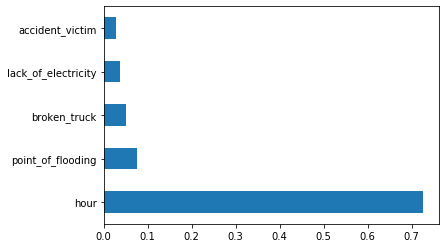

In [92]:

show_top_decition_classifier_feature(df, "DecisionTreeRegressor", 5)

[6.81828190e-01 2.41665873e-02 4.88827411e-02 4.80829319e-03
 2.66186816e-02 2.17003186e-02 3.52088617e-04 1.24175822e-03
 1.20816860e-03 8.40583886e-02 2.52402021e-03 3.63125530e-02
 6.12776442e-03 1.85340068e-02 9.16814938e-03 2.97477144e-02
 2.72057604e-03]


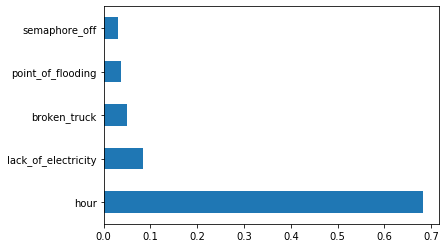

In [93]:
show_top_decition_classifier_feature(df, "ExtraTreesRegressor", 5)

Here we find that by different regressors, we have got different is the feature that is affecting traffic percent has different orders but the combinations are the same. 

In [105]:
print("1")

1
